In [69]:
import warnings
warnings.filterwarnings("ignore")
#gpu 사용 
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

In [70]:
from sklearn.model_selection import train_test_split


In [71]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
# 표준화
train_scaled = train_input / 255.0  # 시각화 하므로 /255
# 학습과 검증용으로 나누기 
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled,train_target, test_size = 0.2, random_state=42
)

In [72]:
# model 함수 구현
def model_fn(a_layer=None): # default는 none
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100,activation="relu"))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10,activation="softmax"))
    return model

In [73]:
model = model_fn()
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 100)               78500     
                                                                 
 dense_31 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3096 - accuracy: 0.8899
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2985 - accuracy: 0.8948
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2919 - accuracy: 0.8972
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2823 - accuracy: 0.9009
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2772 - accuracy: 0.9035


In [76]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [77]:
history.history['loss']

[0.3096335530281067,
 0.2984561026096344,
 0.2918711006641388,
 0.28232771158218384,
 0.2771618366241455]

### 손실곡선 

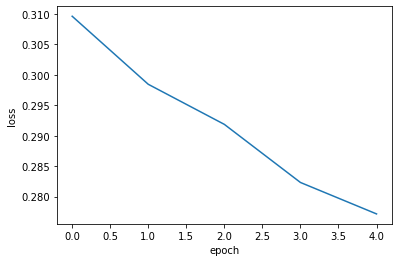

In [78]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

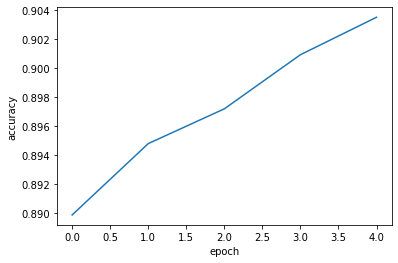

In [79]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [80]:
model =model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=20)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5326 - accuracy: 0.8119
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3901 - accuracy: 0.8576
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3535 - accuracy: 0.8727
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3312 - accuracy: 0.8812
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3181 - accuracy: 0.8868
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3077 - accuracy: 0.8900
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2969 - accuracy: 0.8940
Epoch 8/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2878 - accuracy: 0.8979
Epoch 9/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2817 - accuracy: 0.8997
Epoch 10/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.276

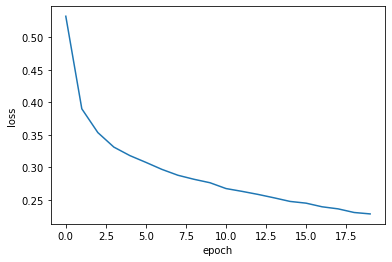

In [83]:
# epochs =20 일때 loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

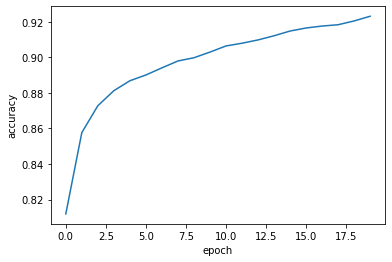

In [84]:
import matplotlib.pyplot as plt
# epochs =20 일때 accuracy
plt.plot(history.history['accuracy'])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

> 검증 세트 만든 이유: 과대적합 확인할려구

---
### 검증 손실
: 검증 세트에 대한 정확도를 파악하기 위해 validation data를 사용한다.

In [85]:
model =model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=20,
                    validation_data= (val_scaled, val_target)
)

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5296 - accuracy: 0.8140 - val_loss: 0.4128 - val_accuracy: 0.8528
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3908 - accuracy: 0.8602 - val_loss: 0.4002 - val_accuracy: 0.8588
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3533 - accuracy: 0.8728 - val_loss: 0.3547 - val_accuracy: 0.8777
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3326 - accuracy: 0.8808 - val_loss: 0.3549 - val_accuracy: 0.8750
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3194 - accuracy: 0.8843 - val_loss: 0.3676 - val_accuracy: 0.8733
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3081 - accuracy: 0.8908 - val_loss: 0.3583 - val_accuracy: 0.8817
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2979 - accuracy: 0.8950 - val_loss: 0.3654 - val_accuracy:

In [86]:
history.history.keys()
# train과 검증용도 담겼다.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

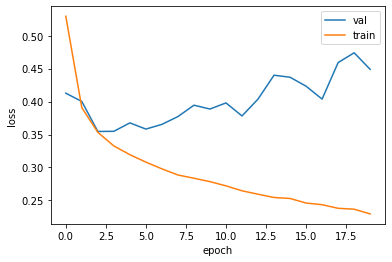

In [91]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["val","train"])
plt.show()

> 훈련세트는 epoch가 증가함에 따라 손실이 떨어지고 있으나<br>
> 검증세트는 epoch가 증가함에 따라 손실이 증가한다.<br>
> 검증세트는 과대적합 발생 (validation이 train보다 잘 맞추는 것)


---
# opimizer로 과대적합 방지 시도(adam)

In [92]:
model =model_fn()
model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=20,
             validation_data = (val_scaled,val_target)
)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5253 - accuracy: 0.8155 - val_loss: 0.4221 - val_accuracy: 0.8505
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3926 - accuracy: 0.8604 - val_loss: 0.3781 - val_accuracy: 0.8623
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3522 - accuracy: 0.8731 - val_loss: 0.3455 - val_accuracy: 0.8737
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3246 - accuracy: 0.8816 - val_loss: 0.3493 - val_accuracy: 0.8737
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3078 - accuracy: 0.8875 - val_loss: 0.3473 - val_accuracy: 0.8751
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2916 - accuracy: 0.8928 - val_loss: 0.3207 - val_accuracy: 0.8851
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2793 - accuracy: 0.8967 - val_loss: 0.3355 - val_accuracy:

In [93]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

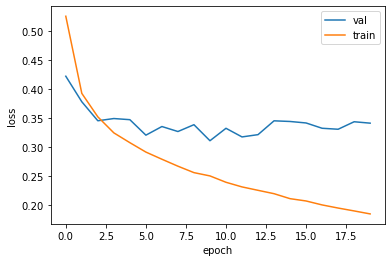

In [94]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["val","train"])
plt.show()

> 훈련세트는 epoch가 중거험애 따라 손실이 떨어지고 있으나<br>
> 검증세트는 epoch가 중거험애 따라 손실이 증가한다.<br>
> 이 모델은 훈련세트에는 정확도가 높아 좋디만, 검증세트는 적합하지 않는 과대적합 모델이다<br>
> Optimizzer(최적화 알고리즘)을 사용한 것이 좀 더 나은 모델이나 검증 손실에 대한 부분(과대적합)은 아직 해결이 안됨

---
# drop out 
- 규제
- 신경망 모델에만 있음
- 훈련시에만 각 sample을 처리할 때 은닉층의 임의의 node를 계산에 포함시키지 않는다.

![](../Data/dropout.png)

In [95]:
# model dropout 추가
model = model_fn(keras.layers.Dropout(0.3)) # dropout - rate = 0.3 
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 784)               0         
                                                                 
 dense_38 (Dense)            (None, 100)               78500     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_39 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [96]:
# Dropout해서 만든 모델에 손실함수 끼우고 학습시키기 

model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=20,
  validation_data = (val_scaled,val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5875 - accuracy: 0.7932 - val_loss: 0.4269 - val_accuracy: 0.8456
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4339 - accuracy: 0.8445 - val_loss: 0.3866 - val_accuracy: 0.8592
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4031 - accuracy: 0.8546 - val_loss: 0.3701 - val_accuracy: 0.8656
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3800 - accuracy: 0.8616 - val_loss: 0.3597 - val_accuracy: 0.8690
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3670 - accuracy: 0.8641 - val_loss: 0.3572 - val_accuracy: 0.8707
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3533 - accuracy: 0.8701 - val_loss: 0.3385 - val_accuracy: 0.8765
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3444 - accuracy: 0.8733 - val_loss: 0.3368 - val_accuracy:

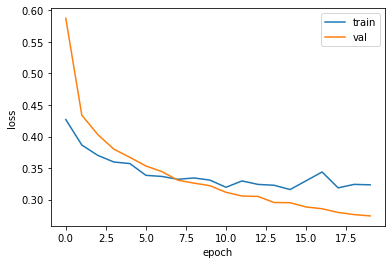

In [97]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train","val"])
plt.show()

> epoch 가 10일 경우 train과 val의 차이가 적은 거 같다 
> 기본적으로 훈련세트의 손실이 검증세트보다 적게 나오는 epoch의 갯수를 선택한다.

---
### 모델의 저장과 복원
- hdf5 format으로 저장

In [98]:
# model 저장 
model.save("../Data/model-whole.h5")

In [99]:
# 복원
model = keras.models.load_model("../Data/model-whole.h5")

In [100]:
# 사용
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3235 - accuracy: 0.8873


[0.32349032163619995, 0.887333333492279]

---
# Calbacks
- 훈련수행시 손실값이 제일 작은 함수를 저장해준다. <- 굉장히 편함

In [105]:
model = model_fn(keras.layers.Dropout(0.3)) # dropout - rate = 0.3 
model.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics='accuracy')
# 손실값이 적은 함수 저장 
checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-model.h5")
model.fit(train_scaled,train_target,epochs=20,
                    validation_data = (val_scaled, val_target),
                    callbacks = [checkpoint_cb]
                    )

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5888 - accuracy: 0.7938 - val_loss: 0.4185 - val_accuracy: 0.8499
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4378 - accuracy: 0.8426 - val_loss: 0.3875 - val_accuracy: 0.8611
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4060 - accuracy: 0.8533 - val_loss: 0.3629 - val_accuracy: 0.8680
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3842 - accuracy: 0.8609 - val_loss: 0.3588 - val_accuracy: 0.8699
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3684 - accuracy: 0.8668 - val_loss: 0.3493 - val_accuracy: 0.8723
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3542 - accuracy: 0.8710 - val_loss: 0.3363 - val_accuracy: 0.8777
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3494 - accuracy: 0.8719 - val_loss: 0.3520 - val_accuracy:

In [106]:
model = keras.models.load_model("../Data/best-model.h5")
model.evaluate(val_scaled, val_target)
#검증용의 손실과 정확도 

375/375 [==============================] - 1s 1ms/step - loss: 0.3262 - accuracy: 0.8857


[0.3262333869934082, 0.8857499957084656]

---
# early stopping(조기종료)
- callback처럼 끝까지 기다리는 것이 아니고 hyper parameter를 선정하여 한계값을 정해 실행한다.

In [109]:
model = model_fn(keras.layers.Dropout(0.3)) 
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
# 손실값이 적은 함수 저장 
checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-model.h5") 
# 조기종료 > 가장 좋은 값으로 저장 
# patience =  val_loss가 2번까지 올라가도 참아줌
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True) 
# - restore_best_weights : True 반드시. 참은 거 중에 가장 좋았던 걸로 지정! 
history = model.fit(train_scaled, train_target, epochs=20, 
                    validation_data = (val_scaled, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb]
                    ) 

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5931 - accuracy: 0.7924 - val_loss: 0.4173 - val_accuracy: 0.8512
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4395 - accuracy: 0.8414 - val_loss: 0.3838 - val_accuracy: 0.8577
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4043 - accuracy: 0.8532 - val_loss: 0.3687 - val_accuracy: 0.8634
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3820 - accuracy: 0.8607 - val_loss: 0.3657 - val_accuracy: 0.8658
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3636 - accuracy: 0.8656 - val_loss: 0.3472 - val_accuracy: 0.8737
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3490 - accuracy: 0.8718 - val_loss: 0.3391 - val_accuracy: 0.8735
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3389 - accuracy: 0.8736 - val_loss: 0.3351 - val_accuracy:

In [111]:
# 몇번째 에서 학습종료 하였나?
early_stopping_cb.stopped_epoch

8

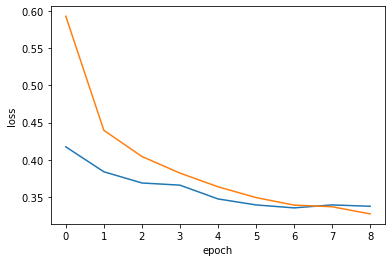

In [112]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()